# Least Squares Example: Polynomial Regression

Suppose we've been given the following 9 input/output data pairs:

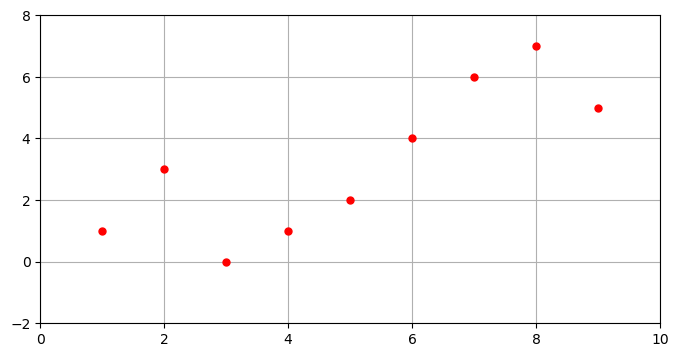

In [1]:
# define (x,y) coordinates of the points
x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
y = [ 1, 3, 0, 1, 2, 4, 6, 7, 5 ]

# We can use the PyPlot package to graph these points
using PyPlot
figure(figsize=(8,4))
plot(x,y,"r.", markersize=10)
axis([0,10,-2,8])
grid()

These points look like they might fit a polynomial of degree 3 (highest order term is $x^3$). Let's try fitting a polynomial to these points:

In [2]:
# order of polynomial to use
k = 3

# fit using a function of the form f(x) = p x^k + q x^(k-1) + ... + rk x + s

# our matrix A will need to have m rows, where m is the number of data points
m = length(x)
# initialize A to be a matrix of zeros with m rows and k+1 columns
# (there will be coefficients on x^3, x^2, x^1, and x^0, so 4 columns)
A = zeros(m,k+1)

# now loop over each row and each column
# the ij'th entry of A will be x_i ^ (k+1 - j)
# e.g., row 1 column 1: x_1 ^ (4-1) = x_1^3
for i = 1:m
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end
display(A)

9×4 Matrix{Float64}:
   1.0   1.0  1.0  1.0
   8.0   4.0  2.0  1.0
  27.0   9.0  3.0  1.0
  64.0  16.0  4.0  1.0
 125.0  25.0  5.0  1.0
 216.0  36.0  6.0  1.0
 343.0  49.0  7.0  1.0
 512.0  64.0  8.0  1.0
 729.0  81.0  9.0  1.0

Let's call our variables/polynomial coefficients "u" to avoid notation confusion. Now our goal is to try to solve Au = y to find the values of u that best match our data.

We'll  solve our least squres problem in a few different ways. First, we'll solve it as an optimization problem where we minimize the 2-norm of Au - y:

In [6]:
# NOTE: To do this you need Gurobi installed! You can easily get an academic license for Gurobi at 
# https://www.gurobi.com/downloads/end-user-license-agreement-academic/

using JuMP, Gurobi

m = Model(Gurobi.Optimizer)

@variable(m, u[1:k+1])
@objective(m, Min, sum( (y - A*u).^2 ) )
set_silent(m)

optimize!(m)
uopt = value.(u)
println(uopt)

Academic license - for non-commercial use only - expires 2022-06-27
[-0.06481481481100655, 1.0425685425632636, -4.083092833069389, 5.206349206321174]


Next, we'll solve it using the normal equations:

In [7]:
inv(A'*A)*(A'*y)

4-element Vector{Float64}:
 -0.06481481481481666
  1.0425685425685742
 -4.083092833093133
  5.206349206349614

Finally, we'll use the backslash operator:

In [8]:
A\y

4-element Vector{Float64}:
 -0.06481481481481527
  1.0425685425685498
 -4.083092833092866
  5.206349206349248

As you can see, we got the same answer using all three approaches! Now let's plot our data versus our polynomial to see how we did. We can also calculate the 2-norm of Au - y to find the magnitude of the "error" between our data and polynomial.

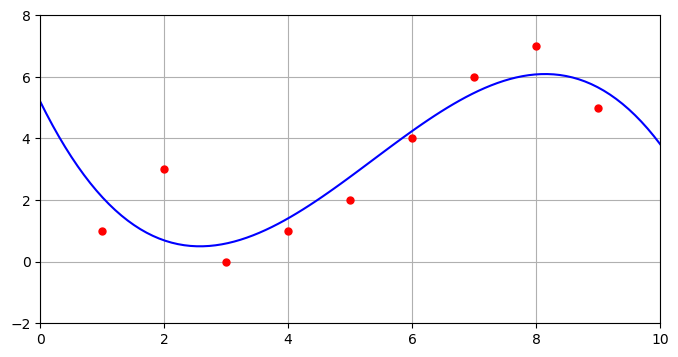

In [9]:
using PyPlot

# we'll graph 100 points along our polynomial between x=0 and x=10
npts = 100
x_poly = range(0,stop=10,length=npts)
# initialize the output vector with all zeros
y_poly = zeros(npts)

# calculate what each output should be using our polynomial
for j = 1:npts
    y_poly[j] = uopt[1] * x_poly[j]^3 + uopt[2] * x_poly[j]^2 + uopt[3] * x_poly[j] + uopt[4]
end

# graph the observed data against the point
figure(figsize=(8,4))
plot( x, y, "r.", markersize=10)
plot( x_poly, y_poly, "b-")
axis([0,10,-2,8])
grid()

In [10]:
# total error ||Ax - y||
y_calc = zeros(9)
for j = 1:9
    y_calc[j] = uopt[1] * x[j]^3 + uopt[2] * x[j]^2 + uopt[3] * x[j] + uopt[4]
end

using LinearAlgebra
err = norm(y_calc - y)
println("Total 2-norm error: ", err)

Total 2-norm error: 3.0374050974194615
